#  Xác định mối quan hệ giữa các thẻ (tags) trong bộ dữ liệu

## Lý do chọn câu hỏi

Việc trả lời câu hỏi trên giúp chúng ta hiểu rõ hơn về sự phát triển của trào lưu viết sách qua các thời kỳ thông qua các điểm sau:

1. **Phân loại và xếp hạng các chủ đề**:
   - Giúp xác định những chủ đề có ảnh hưởng lớn trong văn học và nghiên cứu qua các thời kỳ, từ đó nhận diện được xu hướng phát triển của các chủ đề quan trọng.
   - Cung cấp một thước đo định lượng cho các chủ đề hoặc thẻ (tags), từ đó hỗ trợ quá trình phân tích dữ liệu hiệu quả hơn, giúp hiểu được tầm ảnh hưởng của các chủ đề trong một bối cảnh cụ thể.

2. **Tìm các cụm chủ đề liên kết**:
   - Sử dụng mạng để phát hiện các cụm chủ đề có sự liên kết chặt chẽ với nhau, giúp nhận diện các nhóm chủ đề liên quan và sự tương tác giữa chúng.

**Ý nghĩa thực tiễn**: Thông tin thu được từ việc xác định mối quan hệ giữa các chủ đề có thể là nền tảng để xây dựng các công cụ tìm kiếm hoặc hệ thống đề xuất sách, giúp người dùng dễ dàng tiếp cận các tác phẩm có liên quan hoặc phát hiện các chủ đề mới trong nghiên cứu và văn học.

## Tiền xử lý dữ liệu

### Thêm thư viện Python

In [110]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# import seaborn as sns
import plotly.graph_objects as go
import networkx as nx

import matplotlib.colors as mcolors
import matplotlib.cm as cm

### Đọc bộ dữ liệu từ file

In [3]:
df = pd.read_parquet("metadata_completed_v2.parquet")

display(df.head())
print(df.info())

,title,creator,birthdate,deathdate,issued,rights,subjects,index,reading ease score,reading ease level,download count,description
0,The Master Spirit,"Magnay, William, Sir",1855,1917,2022-03-25,Public domain in the USA.,"[London (England), Fiction, Love stories, Adve...",67703,71.3,7th grade,57.0,Fairly easy to read.
1,The Family on Wheels,"Oxley, J. Macdonald (James Macdonald)",1855,1907,2017-11-05,Public domain in the USA.,"[Orphans, Juvenile fiction, Siblings, Juvenile...",55891,77.9,7th grade,43.0,Fairly easy to read.
2,Three Good Giants\nWhose Ancient Deeds are rec...,"Rabelais, François",1835,1901,2019-04-09,Public domain in the USA.,"[Fantasy fiction, Conduct of life, Juvenile fi...",59235,76.2,7th grade,105.0,Fairly easy to read.
3,Drake's Road Book of the Grand Junction Railwa...,"Drake, James, active 1825",<NA>,<NA>,2013-07-31,Public domain in the USA.,[Grand Junction Railway Company (Great Britain...,43367,65.5,8th & 9th grade,127.0,Neither easy nor difficult to read.
4,Facts and Speculations on the Origin and Histo...,"Chatto, William Andrew",1799,1864,2014-05-04,Public domain in the USA.,"[Playing cards, History, GV]",45584,62.7,8th & 9th grade,158.0,Neither easy nor difficult to read.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9945 entries, 0 to 9944
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               9945 non-null   object        
 1   creator             9929 non-null   object        
 2   birthdate           8266 non-null   Int64         
 3   deathdate           8117 non-null   Int64         
 4   issued              9945 non-null   datetime64[ns]
 5   rights              9945 non-null   object        
 6   subjects            9945 non-null   object        
 7   index               9945 non-null   object        
 8   reading ease score  9945 non-null   float64       
 9   reading ease level  9945 non-null   object        
 10  download count      9945 non-null   float64       
 11  description         9521 non-null   object        
dtypes: Int64(2), datetime64[ns](1), float64(2), object(7)
memory usage: 1.0+ MB
None


### Cho biết thông tin về các chủ đề có trong bộ dữ liệu

#### Số lượng thẻ trong bộ dữ liệu

In [ ]:
all_subjects, all_subjects_counts = np.unique(df['subjects'].explode(), return_counts=True)

print(f"""
THỐNG KÊ TAG:
      Số lượng tag khác nhau có trong bộ dữ liệu: {all_subjects.shape[0]}
      Số lượng tag tổng cộng trong bộ dữ liệu: {all_subjects_counts.sum()}
""")


THỐNG KÊ TAG:
      Số lượng tag khác nhau có trong bộ dữ liệu: 6975
      Số lượng tag tổng cộng trong bộ dữ liệu: 54910



#### Thống kê thẻ theo số lượng sách có thẻ đó

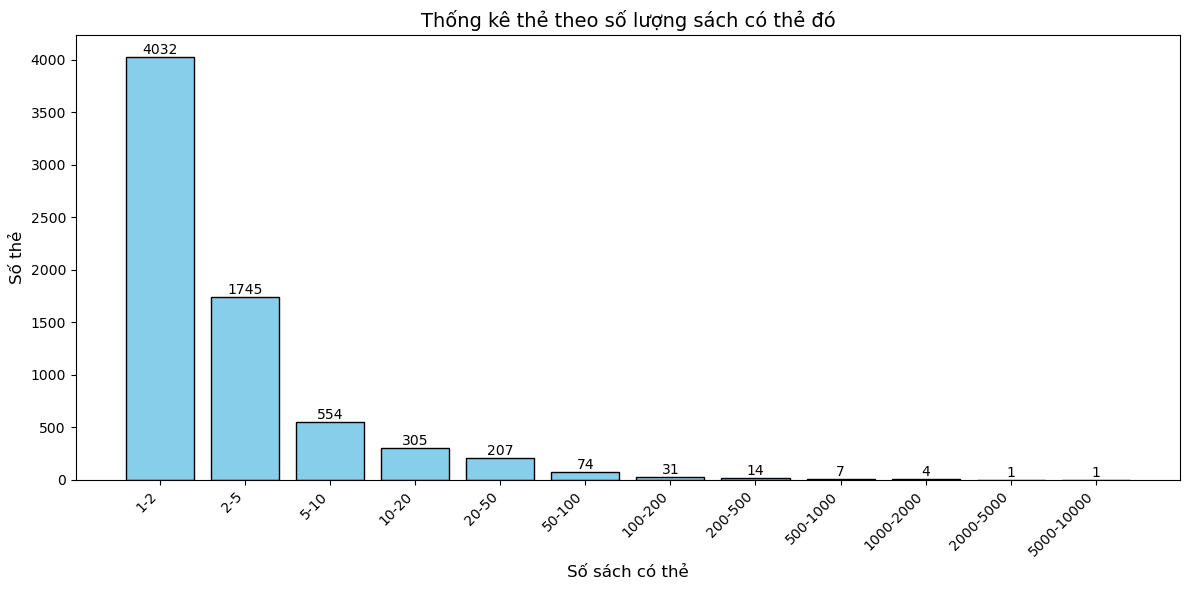

In [112]:
ranges = [
    (1, 2), (2, 5), (5, 10), (10, 20), (20, 50), (50, 100), (100, 200), (200, 500),
    (500, 1000), (1000, 2000), (2000, 5000), (5000, 10000)
]

count_counts = [
    np.sum((all_subjects_counts >= a) & (all_subjects_counts < b))
    for a, b in ranges
]

# Prepare range labels
range_labels = [f"{a}-{b}" for a, b in ranges]

plt.figure(figsize=(12, 6))
bars = plt.bar(range_labels, count_counts, color='skyblue', edgecolor='black')

for bar, count in zip(bars, count_counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(count),
        ha='center', va='bottom', fontsize=10
    )

plt.xlabel('Số sách có thẻ', fontsize=12)
plt.ylabel('Số thẻ', fontsize=12)
plt.title('Thống kê thẻ theo số lượng sách có thẻ đó', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ta thấy:
- Số lượng thẻ gắn với ít sách (1-2 sách) chiếm đa số, với 4032 thẻ, tức là phần lớn thẻ chỉ liên quan đến một hoặc hai cuốn sách.
- Chỉ một số rất ít thẻ được liên kết với nhiều sách (ví dụ: 200-500 sách hoặc nhiều hơn). Các thẻ liên kết với trên 1000 sách trở lên là cực kỳ hiếm, chỉ có 1-2 trường hợp trong tập dữ liệu.

## Phân tích dữ liệu

Do giới hạn về thời gian và khả năng xử lý, chúng ta chỉ xem xét các thẻ của 2000 cuốn sách có số lượt tải về cao nhất.

Đồng thời, để làm cho đồ thị dễ nhìn hơn, chúng ta sẽ chỉ hiển thị các cạnh kết nối giữa hai thẻ xuất hiện cùng nhau trong hơn 5 cuốn sách.

Để tăng tính tương tác cho đồ thị, ta sử dụng thư viện `plotly` trong Python.

Tạo đồ thị, giảm đi số lượng cạnh và đỉnh như trên

In [104]:
MIN_EDGE_WEIGHT = 5
MAX_SUBJECT_AMOUNT = 2000

G = nx.Graph()
for subjects in df['subjects'].dropna().head(MAX_SUBJECT_AMOUNT):
    for i, subject1 in enumerate(subjects):
        for subject2 in subjects[i + 1:]:
            if G.has_edge(subject1, subject2):
                G[subject1][subject2]['weight'] += 1
            else:
                G.add_edge(subject1, subject2, weight=1)

G_filtered = nx.Graph((u, v, e) for u, v, e in G.edges(data=True) if e['weight'] > MIN_EDGE_WEIGHT)

Vẽ cạnh giữa các đỉnh, tô màu các cạnh theo số liên kết giữa hai đỉnh

In [105]:
pos = nx.spring_layout(G_filtered, k=0.1, seed=42)

edge_x = []
edge_y = []
edge_traces = []

edge_weights = [G_filtered[u][v]['weight'] for u, v in G_filtered.edges()]
min_weight, max_weight = min(edge_weights), max(edge_weights)

norm = mcolors.Normalize(vmin=min_weight, vmax=max_weight)
cmap = cm.get_cmap('Paired_r')

for edge in G_filtered.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight = G_filtered[edge[0]][edge[1]]['weight']
    color = mcolors.to_hex(cmap(norm(weight)))

    edge_x = [x0, x1, None]
    edge_y = [y0, y1, None]
    edge_traces.append(
        go.Scatter(
            x=edge_x,
            y=edge_y,
            line=dict(width=1, color=color),
            mode='lines',
            hoverinfo='none'
        )
    )

Vẽ các đỉnh, tô màu và tăng kích thước theo só đỉnh khác mà đỉnh đó liên kết

In [106]:
node_x = []
node_y = []
node_size = []
node_text = []

for node in G_filtered.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_size.append(G_filtered.degree[node])
    node_text.append(f"{node}<br>Số lượng kết nối: {G_filtered.degree[node]}")

node_color = [np.log(degree + 1) for degree in node_size]

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=node_color,
        colorbar=dict(
            thickness=15,
            title="Số lượng kết nối của thẻ",
            tickvals=[np.log(i + 1) for i in range(1, max(node_size) + 1, max(1, max(node_size) // 5))],
            ticktext=[str(i) for i in range(1, max(node_size) + 1, max(1, max(node_size) // 5))],
            x=1.02,
            xanchor='left'
        )
    ),
    text=node_text
)

Vẽ đồ thị

In [109]:
fig = go.Figure(
    data=[*edge_traces, node_trace],
    layout=go.Layout(
        title='Đồ thị biểu diễn liên kết giữa các thẻ',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=0, l=100, r=100, t=40),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

fig.show()

## Nhận xét

* ***Cụm các thẻ lớn nhất***
    - *Các thẻ trung tâm:* Hai thẻ có số liên kết lớn nhất là **Juvenile Fiction** (Viễn tưởng thanh thiếu niên, 226 kết nối) và **Fiction** (Viễn tưởng, 166 kết nối), làm trọng tâm của cụm thẻ lớn nhất
        + Những chủ đề thường đi chung với ***Fiction***: Khoa học (Spaceship, Science Fictions, Cyborgs), Trinh thám (Nightlife, Prisoner, Criminal)
        + Những chủ đề thường đi chung với **Juvenile Fiction**: Trẻ em/trẻ vị thành niên (Adopted children, Young man, Teenage boys), Thực trạng cuộc sống (Alcoholism, Hunger, Robbery), Phiêu lưu (Treasure Trove, Sailing, Circus)
    - *Các thẻ trọng điểm:* Những thẻ có số lượng liên kết ở tầm trung (20 - 70 kết nối) bao gồm:
        + [Văn học ở các nước/ văn học viễn tưởng](https://www.loc.gov/aba/cataloging/classification/lcco/lcco_p.pdf), điểm hình là **PS** (Văn học Mĩ, 33 kết nối), **PR** (Văn học Anh, 34 kết nối), và **PZ** (Văn học viễn tưởng, 32 kết nối)
        + Về Vương quốc Anh: **England** (Nước Anh, 26 kết nối), **Great England** (Vương quốc Anh, 29 kết nối), **London** (Luân Đôn, 11 kết nối)
        + Văn học về đời sống: **History** (Lịch sử, 69 kết nối), **Description and Travel** (Mô tả và Du lịch, 21 kết nối), **Social life and Customs** (Đời sống xã hội và Phong tục, 24 kết nối)
        + Các thể loại văn học: **Drama** (Bi kịch, 21 kết nối), **Diaries** (Nhật ký, 12 kết nối), **Translation into English** (Dịch thuật qua tiếng Anh, 14 kết nối)
    - *Các thẻ vệ tinh:* Những thẻ có số lượng liên kết dưới trung bình (5 - 20 kết nối) bao gồm:
        + Các vùng đất: **Africa**, **Canada**, **Middle East**
        + Các thời kỳ: **20th Century**, **Early Works to 1800s**, **19th Century**
        + Chiến tranh: **Civil War 1861-1865**, **World War, 1914-1918**
    - *Các thẻ ngoại vi:* Những thẻ có số lượng liên kết thấp (dưới 5 kết nối) bao hàm một lượng lớn các chủ đề, bao gồm các chủ đề nói trên.

* ***Những nhóm cụm nhỏ hơn*** tồn tại với ít hoặc không có liên quan đến cụm lớn:
    - Châm biết đời sống (Social Commentary)
    - Tôn giáo (Kitô giáo & Thiên Chúa Giáo) (Catholism & Christianity)
    - Hướng dẫn tham quan Thung Lũng Tử Thần tại Mỹ

* ***Thông tin đúc kết được***
    - Viễn tưởng (tính luôn cả viễn tưởng thanh thiếu niên) thể hiện được vai trò quan trọng trong việc liên kết các thể loại văn học khác với nhau, đồng thời cũng cho thấy được sự linh hoạt, đa dạng, và sáng tạo trong các chủ đề của nó.
    - Do bộ dữ liệu chỉ lấy thông tin về các cuốn sách viết bằng tiếng Anh, nên sự thiên vị cho những chủ đề liên quan đến các nước nói tiếng Anh là không thể tránh khỏi (Những địa điểm như US, UK, Luân Đôn có số liên kết cao; tương tự với các sự kiện lịch sử như Nội chiến Mỹ hay Thể chiến I). Tuy nhiên bộ dữ liệu cũng cho thấy sự đa dạng với một loạt các chủ đề khác (Vùng Trung Đông, Ý).
    - Các cụm nhỏ hơn thể hiện sự tập trung chuyên biệt hoặc không theo truyền thống của nhiều chủ đề, chẳng hạn như các hướng dẫn du lịch hoặc tôn giáo, cho thấy sự phong phú trong phạm vi của bộ dữ liệu.